In [351]:
import requests
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import vk_api
from bs4 import BeautifulSoup
from boilerpy3 import extractors
import stop_words
import pymorphy2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize 
from PIL import Image


In [176]:
my_id = '223161172'
url = 'https://api.vk.com/method/'
v = 5.131

In [177]:
def get_friend_ids(user_id, token, v):
    url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v={}'
    json_response = requests.get(url.format(user_id, token, v)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response['response']['items']

# Граф, настало твоё время

In [178]:
friend_ids = get_friend_ids(my_id, token, v)

graph = {friend_id:get_friend_ids(friend_id, token, v) for friend_id in friend_ids}

{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '5383069'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '14924535'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '19575321'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '19947539'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_i

{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '271661756'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '288096852'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '294330903'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '312186872'}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key'

In [404]:
import json

with open('user_data.json', 'w') as fp:
    json.dump(graph, fp)

Ноды - это друзья. Ребра графа - это связь между друзьями

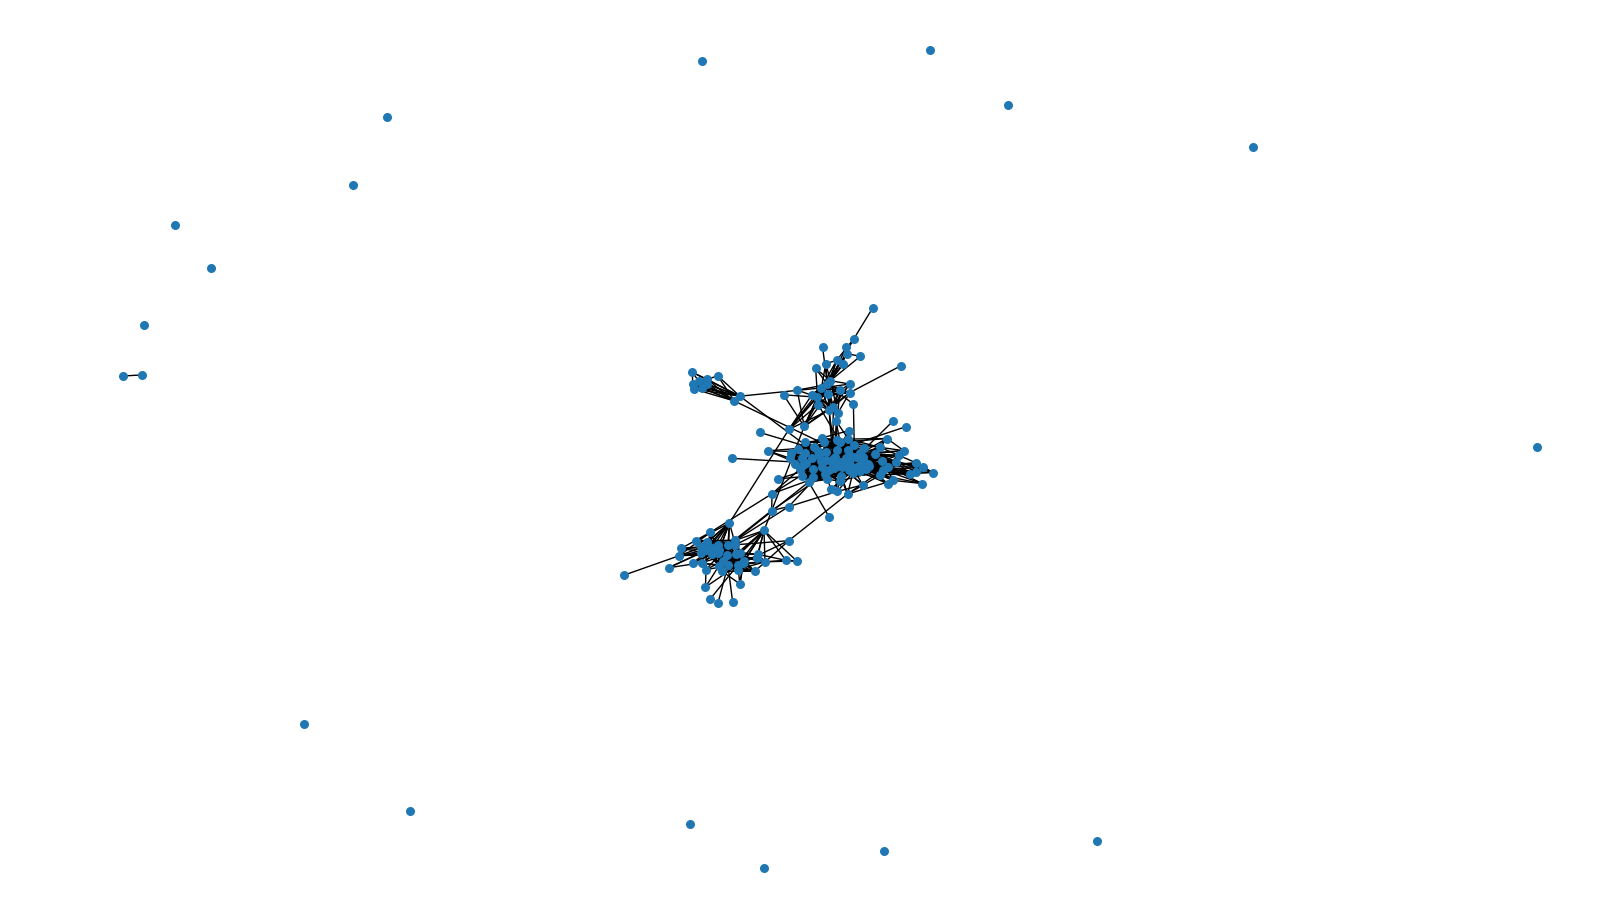

In [403]:
g = networkx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and j in friend_ids:
            g.add_node(j)
            g.add_edge(i, j)

            
plt.figure(3,figsize=(16, 9)) 
networkx.draw(g, node_size=30, with_labels=False)
plt.show()

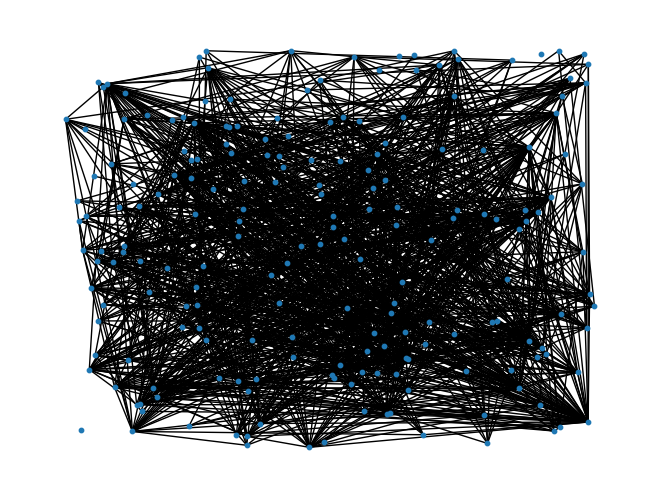

In [184]:
networkx.draw_random(g, node_size=10) 

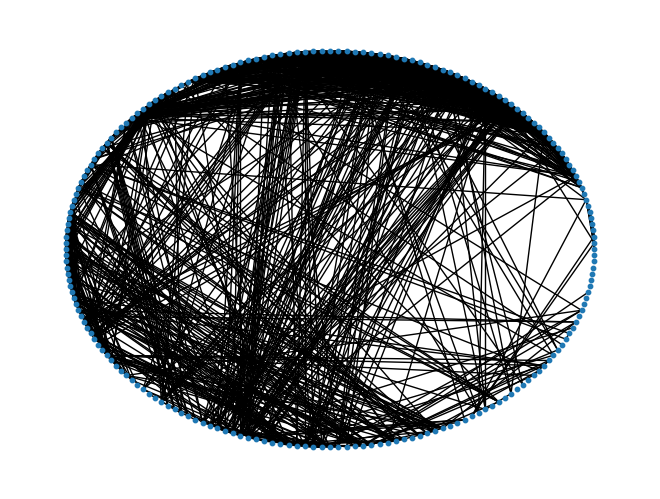

In [185]:
networkx.draw_circular(g, node_size=10)  

# WordCloud

In [338]:
text_content = dict()

for user_id in friend_ids:
    text_content[user_id] = []
    try:
        wall = vk_session.get_api().wall.get(owner_id=user_id, count = 20)
    except:
        continue
    for post in wall['items']:
        text = post['text']
        text_content[user_id].append(text)
        
df = pd.DataFrame(text_content.items())
df.columns = 'id', 'content'
df.set_index('id', inplace = True)

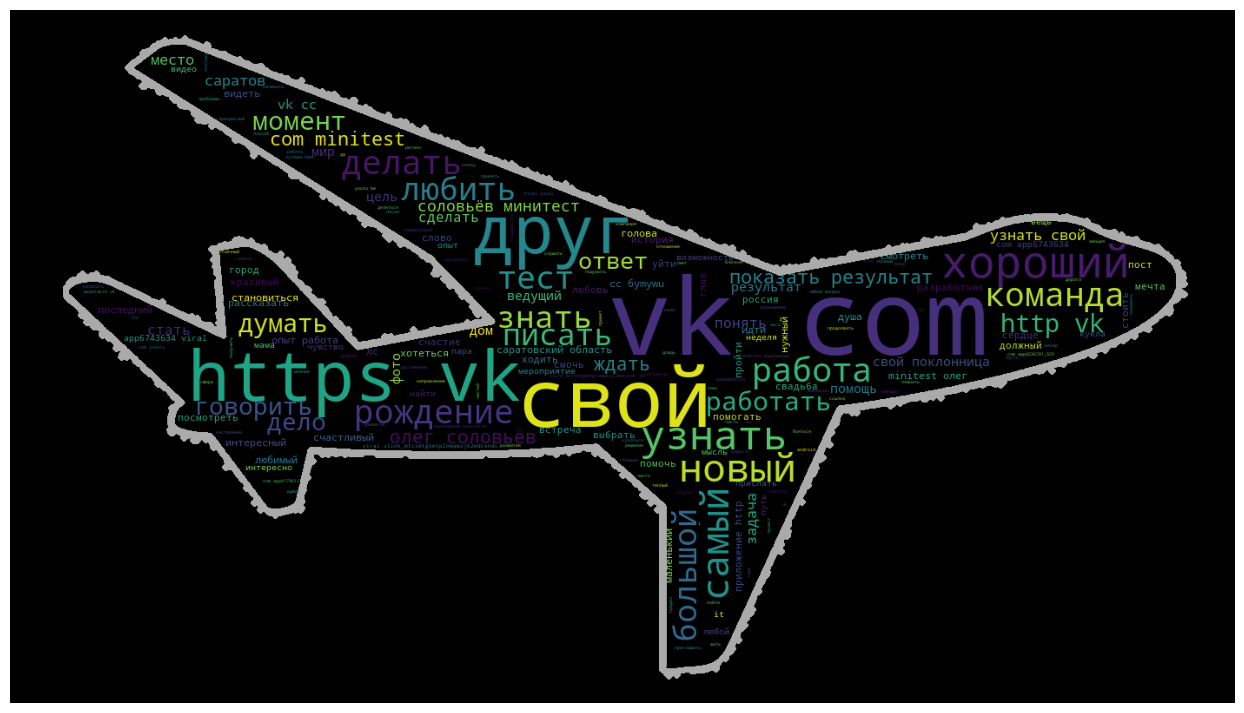

In [384]:
all_content = ' '.join(df.content.apply(lambda x: ' '.join(x)))

lemmatizer = pymorphy2.MorphAnalyzer()
 
def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = lemmatizer.parse(word)
        text_new = text_new + ' ' + word[0].normal_form
    return text_new

text = word_tokenize(all_content)
text = lemmatize_text(text)

mask = np.array(Image.open('../../plane.jpg'))
stop_words = stop_words.get_stop_words('russian')

cloud = WordCloud(stopwords=stop_words, mask=mask, contour_width=10, contour_color='#AAAAAA').generate(text)
plt.figure(figsize=(16,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()